# DWD project - Team Anaconda

### file 4 - Visualization

### importing necessary libraries and reading the final_joined_file created from file 3

In [1]:
# importing packages required for this python notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reding the final_joined_file from directory (created in file 3)
final_joined_file = pd.read_csv('C:/Users/aniru/Desktop/DWD/final_joined_file.csv')

In [3]:
# listing the columns in the final_joined_df dataframe
final_joined_file.columns

Index(['CMPLNT_NUM', 'OFNS_CODE', 'OFNS_DESC', 'OFNS_LEVEL', 'BOROUGH', 'YEAR',
       'ZIPCODE', 'MEDIAN_SALE', 'SALES_COUNT'],
      dtype='object')

In [4]:
# replacing the NaN values in the final_joined_df dataframe with string 'UNKNOWN' to allow for their computation
final_joined_file['OFNS_DESC'] = np.where(final_joined_file['OFNS_DESC'].isnull() == True, 'UNKNOWN' , final_joined_file['OFNS_DESC'])

### first visualization

In [5]:
# subset the final_joined_df dataframe as boro_df and display its first 7 rows to understand its contents
boro_df = final_joined_file.iloc[:,[2,4,7]]
boro_df.head(7)

,OFNS_DESC,BOROUGH,MEDIAN_SALE
0,SEX CRIMES,BRONX,398265.5
1,DANGEROUS DRUGS,BRONX,377975.0
2,HARRASSMENT 2,MANHATTAN,650000.0
3,UNKNOWN,BROOKLYN,495000.0
4,CRIMINAL TRESPASS,BROOKLYN,475000.0
5,HARRASSMENT 2,BRONX,222500.0
6,CRIMINAL MISCHIEF & RELATED OF,MANHATTAN,957960.5


In [6]:
# grouping the boro_df by 'BOROUGH' column and averaging the column 'MEDIAN_SALE' 
boro_df1 = boro_df.groupby(['BOROUGH'], as_index = False)['MEDIAN_SALE'].mean().round(2)
boro_df1

,BOROUGH,MEDIAN_SALE
0,BRONX,322309.00
1,BROOKLYN,561058.87
2,MANHATTAN,870231.90
3,QUEENS,420672.79
4,STATEN ISLAND,380534.45


In [7]:
# grouping the boro_df by 'BOROUGH' column and counting the number of crimes per borough using 'OFNS_DESC' column 
boro_df2 = boro_df.groupby(['BOROUGH'], as_index = False)['OFNS_DESC'].count()
boro_df2

,BOROUGH,OFNS_DESC
0,BRONX,849618
1,BROOKLYN,1175414
2,MANHATTAN,797291
3,QUEENS,760239
4,STATEN ISLAND,178076


In [8]:
# merging boro_df1 and boro_df2 on column 'BOROUGH'
boro_join_df = boro_df1.merge(boro_df2, 'inner')
boro_join_df

,BOROUGH,MEDIAN_SALE,OFNS_DESC
0,BRONX,322309.00,849618
1,BROOKLYN,561058.87,1175414
2,MANHATTAN,870231.90,797291
3,QUEENS,420672.79,760239
4,STATEN ISLAND,380534.45,178076


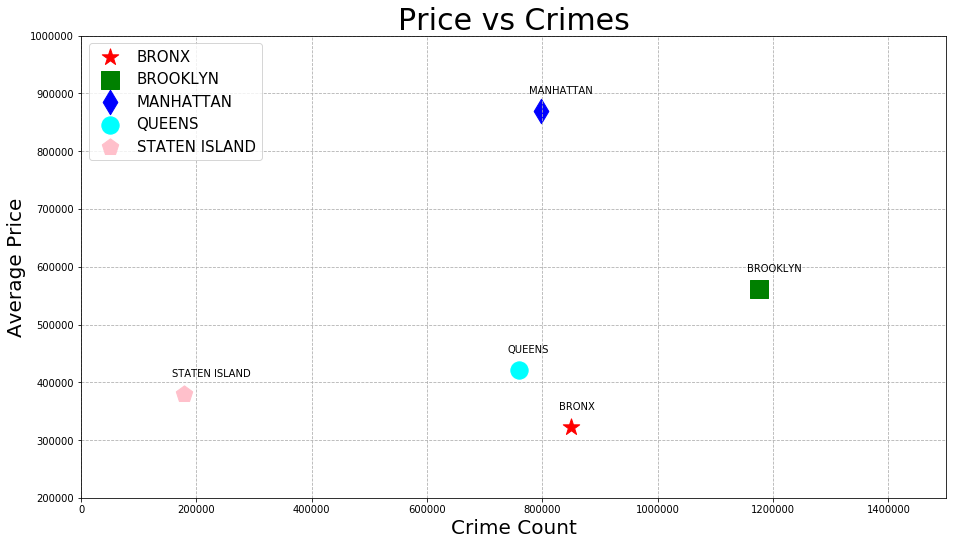

In [10]:
### visualizing the first stacked graph

# setting the colors for each borough
color = ['r', 'g', 'b', 'cyan', 'pink']

# defining the markers for each borough
markers = ['*', 's', 'd', 'o', 'p']

# defining the figure size
plt.figure(figsize=(15.5, 8.5))

# looping over the length of boro_join_df
for i in range(0,len(boro_join_df)):
    
    # creating scatter plot and setting the colors, markers and marker size
    plt.scatter(x = boro_join_df['OFNS_DESC'][i], y = boro_join_df['MEDIAN_SALE'][i], c = color[i], marker = markers[i], s = 300)
    
    # to display the text above each marker and format their position
    plt.annotate(boro_join_df['BOROUGH'][i], (boro_join_df['OFNS_DESC'][i],boro_join_df['MEDIAN_SALE'][i]), (boro_join_df['OFNS_DESC'][i] - 20000,boro_join_df['MEDIAN_SALE'][i] + 30000))
    
    # format the legend size and position
    plt.legend(boro_join_df['BOROUGH'], loc= 'upper left', prop={'size': 15})
    
# displaying grid lines
plt.grid(b = True, which = 'major', linestyle = '--')

# set y axis minimum and maximum limit
plt.ylim(200000, 1000000)

# set x axis minimum and maximum limit
plt.xlim(0,1500000)

# define y axis label and size
plt.ylabel('Average Price', fontsize = 20)

# define x axis label and size
plt.xlabel('Crime Count', fontsize = 20)

# define plot title label and size
plt.title('Price vs Crimes', fontsize = 30)

# saving the file to the system
plt.savefig('C:/Users/aniru/Desktop/DWD/fig_price_vs_crimes')

# display the plot
plt.show()

# second visualization

In [11]:
# subset the final_joined_df dataframe as offense_df and display its first 10 rows to understand its contents
offense_df = final_joined_file.iloc[:,[2,4]]
offense_df.head(10)

,OFNS_DESC,BOROUGH
0,SEX CRIMES,BRONX
1,DANGEROUS DRUGS,BRONX
2,HARRASSMENT 2,MANHATTAN
3,UNKNOWN,BROOKLYN
4,CRIMINAL TRESPASS,BROOKLYN
5,HARRASSMENT 2,BRONX
6,CRIMINAL MISCHIEF & RELATED OF,MANHATTAN
7,ASSAULT 3 & RELATED OFFENSES,BRONX
8,ROBBERY,BROOKLYN
9,ROBBERY,BROOKLYN


In [12]:
# pivoting the offense_df to get crime aggregate for each borough
offense_df = offense_df.pivot_table(index = 'OFNS_DESC', columns = 'BOROUGH', aggfunc = 'size', fill_value = 0)

In [13]:
# sorting the offense_df based on descending order of type of crime
offense_df['total count'] = offense_df['BRONX'] + offense_df['BROOKLYN'] + offense_df['MANHATTAN'] + offense_df['QUEENS'] + offense_df['STATEN ISLAND']
offense_df = offense_df.sort_values(by=['total count'], ascending = False)

# removing 'total count' column  for visualization purposes
offense_df = offense_df.iloc[0:10,0:5]
offense_df

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
OFNS_DESC,,,,,
PETIT LARCENY,115823,184991,169324,123565,27779
HARRASSMENT 2,103993,147131,84526,98135,33722
ASSAULT 3 & RELATED OFFENSES,105718,131514,72108,83610,17863
CRIMINAL MISCHIEF & RELATED OF,80241,120030,65018,87521,22687
GRAND LARCENY,46750,91689,101562,62308,8909
DANGEROUS DRUGS,86592,71462,53544,14900,7509
OFF. AGNST PUB ORD SENSBLTY &,44053,59296,35354,38892,12717
FELONY ASSAULT,42319,51635,25020,30075,4979
ROBBERY,34609,48917,23591,28218,3391


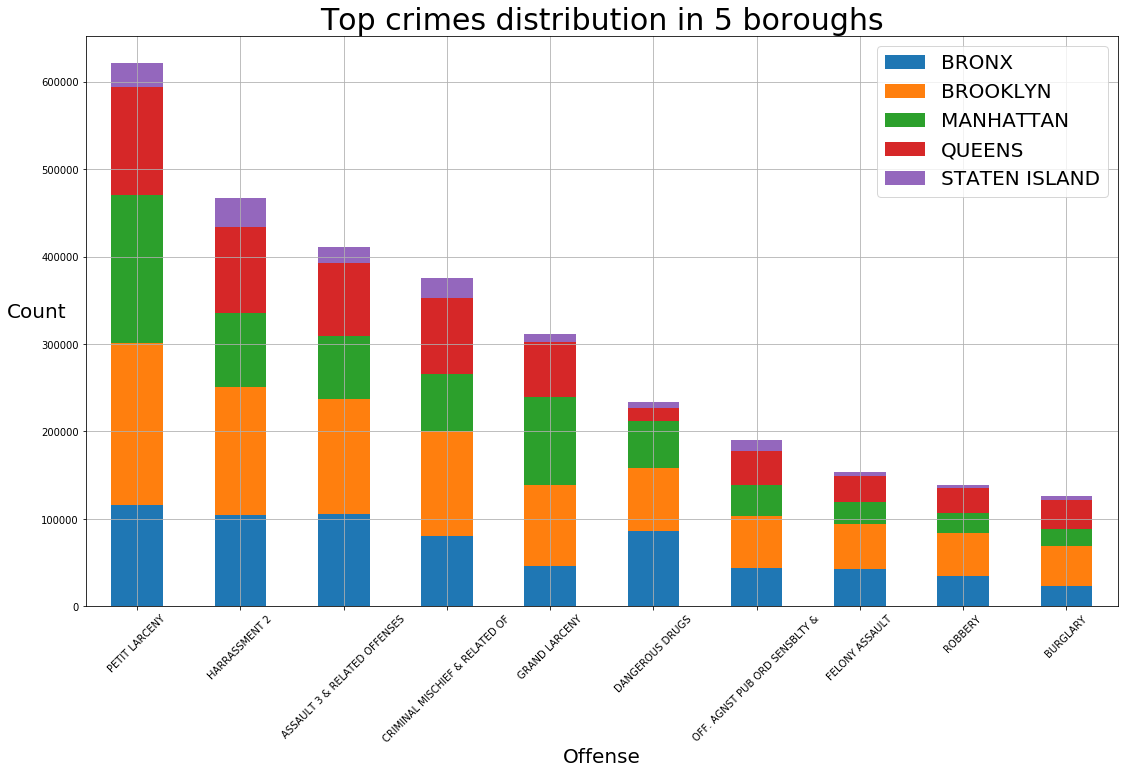

In [17]:
# creating a bar graph for the offense_df dataframe which is stacked and figure size is established
stacked_plot = offense_df.plot(kind = 'bar', stacked = True, figsize = (18.5, 10.5))

# drawing grid lines
plt.grid(b = True, which = 'major', linestyle = '-')

# assigning the title, axes labels and their properties
plt.title('Top crimes distribution in 5 boroughs', fontsize = 30)
plt.ylabel('Count', fontsize = 20, rotation = 0)
plt.xlabel('Offense', fontsize = 20)

# rotating x axis ticks for better visualization
plt.xticks(rotation = 45)

# format the legend size and position 
plt.legend(loc= 'upper right', prop={'size': 20})

#saving the plot to the system
plt.savefig('C:/Users/aniru/Desktop/DWD/fig_crime_dist_across_boroughs', bbox_inches = 'tight')

# show the stacked graph
plt.show()

# third visualization

In [18]:
# subset the final_joined_df dataframe as boro_price_df and display its first 5 rows to understand its contents
boro_price_df = final_joined_file.iloc[:,[4,5,7]]
boro_price_df.head(5)

,BOROUGH,YEAR,MEDIAN_SALE
0,BRONX,2010,398265.5
1,BRONX,2010,377975.0
2,MANHATTAN,2010,650000.0
3,BROOKLYN,2010,495000.0
4,BROOKLYN,2010,475000.0


In [19]:
# pivoting the boro_price_df to get housing price aggregate for each year
boro_price_df = boro_price_df.pivot_table(index = 'YEAR', columns = 'BOROUGH', aggfunc = 'mean', fill_value = 0)

In [20]:
# print boro_price_df to check contents
boro_price_df

MEDIAN_SALE                                              \
BOROUGH          BRONX       BROOKLYN     MANHATTAN         QUEENS   
YEAR                                                                 
2010     322053.031339  437349.499639  8.058683e+05  379611.848226   
2011     303601.126258  428432.303329  7.227226e+05  357913.006940   
2012     283858.223935  453138.576164  8.009747e+05  366480.947493   
2013     305170.168231  490275.375624  7.563920e+05  383818.902243   
2014     298125.722461  562102.177619  8.514395e+05  412174.037158   
2015     315984.294355  660753.947924  8.837979e+05  441319.767142   
2016     357092.816896  725375.174487  1.108312e+06  509247.205818   
2017     396599.337837  775166.797834  1.047601e+06  531208.718775   

                        
BOROUGH  STATEN ISLAND  
YEAR                    
2010     364761.278771  
2011     347076.372824  
2012     357463.569816  
2013     356062.882833  
2014     366670.859339  
2015     383420.077828  
2016     411771.380023  
2017     468582.156461

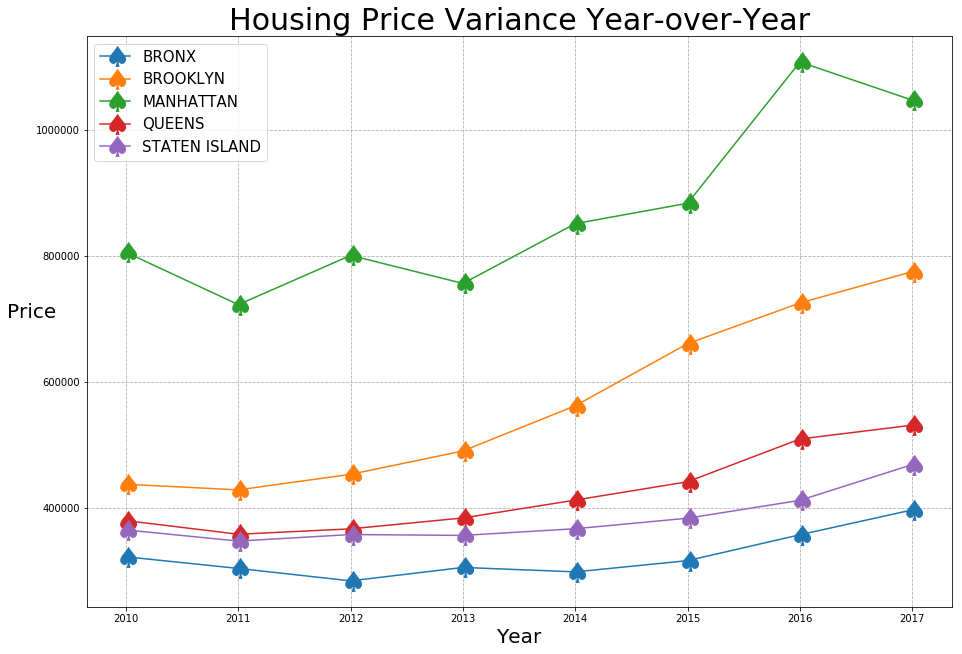

In [21]:
# # creating a line graph for the boro_price_df dataframe with marker, marker size and figure size defined
boro_price_df.plot(marker = '$\spadesuit$', MarkerSize = 20, figsize=(15.5, 10.5))

# format the legend size and position 
plt.legend(boro_price_df['MEDIAN_SALE'], prop={'size': 15})

# drawing grid lines
plt.grid(b=True, which='major', linestyle='--')

# assigning the title, axes labels and their properties
plt.title('Housing Price Variance Year-over-Year', fontsize = 30)
plt.ylabel('Price', fontsize = 20, rotation = 0)
plt.xlabel('Year', fontsize = 20)

#saving the plot to the system
plt.savefig('C:/Users/aniru/Desktop/DWD/fig_pricing_variance_boroughs', bbox_inches = 'tight')

# show the plot
plt.show()


# fourth visualizations

In [22]:
# subsetting the final_joined_file
zip_df = final_joined_file.iloc[:,[4,5,6,7]]

# selecting the rows with borough = queens
zip_q_df = zip_df[zip_df['BOROUGH'] == 'QUEENS']

# remove borough column
zip_q_df = zip_q_df.drop(['BOROUGH'], axis = 1)

# pivot the dataframe to find mean prices for each zipcode in different years
zip_q_df = zip_q_df.pivot_table(index = 'YEAR', columns = 'ZIPCODE', aggfunc = 'mean', fill_value = 0)

In [27]:
### user-defined function to plot zipcode-specific graphs

# pass the dataframe, zipcode and borough name to the UDF
def zipcode_plot(df, zipcode, boro_nm):
    
    # plot the data passed
    df['MEDIAN_SALE', zipcode].plot()
    
    # create a y axis label and rotate it for visibility
    plt.ylabel('Price', rotation = 90)
    
    # define a plot title
    plt.title(boro_nm+' : '+str(zipcode))
    
    # save the plot to the system
    plt.savefig('C:/Users/aniru/Desktop/DWD/fig_'+str(zipcode), bbox_inches = 'tight')
    
    # show the plot for verification
    plt.show()

#### plotting 5 graphs for each zipcode based on data from geo-plot collected in Power BI 

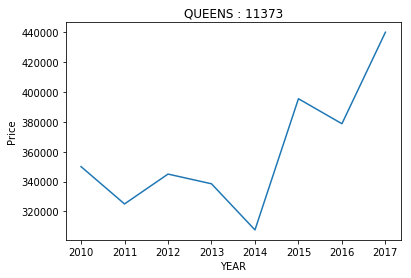

In [28]:
zipcode_plot(zip_q_df, 11373, 'QUEENS')

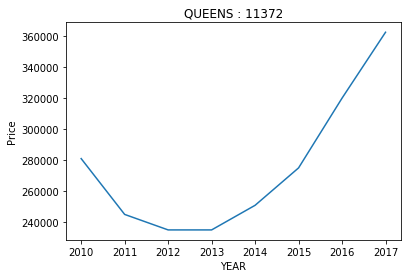

In [29]:
zipcode_plot(zip_q_df, 11372, 'QUEENS')

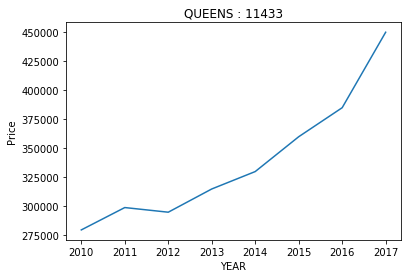

In [30]:
zipcode_plot(zip_q_df, 11433, 'QUEENS')

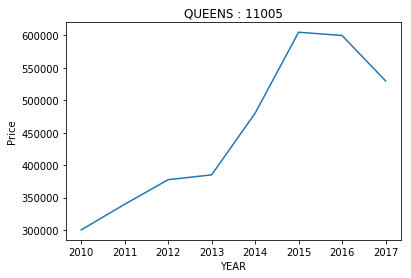

In [31]:
zipcode_plot(zip_q_df, 11005, 'QUEENS')

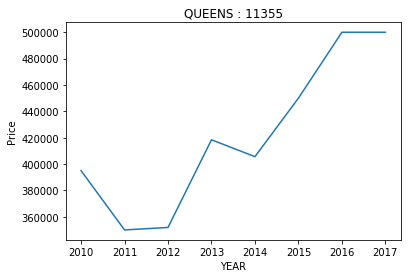

In [32]:
zipcode_plot(zip_q_df, 11355, 'QUEENS')

In [33]:
# selecting the rows with borough = brooklyn
zip_b_df = zip_df[zip_df['BOROUGH'] == 'BROOKLYN']

# remove borough column
zip_b_df = zip_b_df.drop(['BOROUGH'], axis = 1)

# pivot the dataframe to find mean prices for each zipcode in different years
zip_b_df = zip_b_df.pivot_table(index = 'YEAR', columns = 'ZIPCODE', aggfunc = 'mean', fill_value = 0)

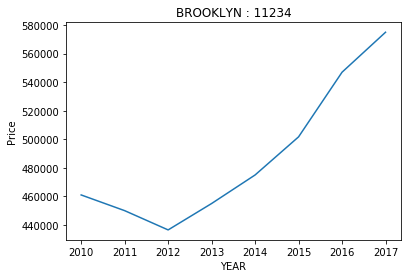

In [34]:
zipcode_plot(zip_b_df, 11234, 'BROOKLYN')

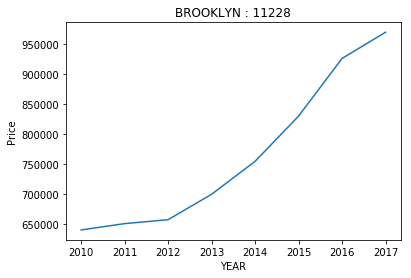

In [35]:
zipcode_plot(zip_b_df, 11228, 'BROOKLYN')

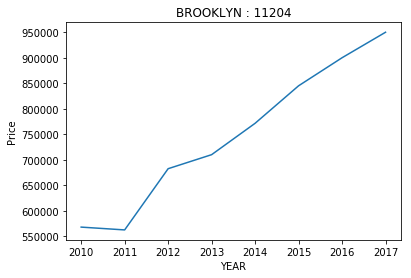

In [36]:
zipcode_plot(zip_b_df, 11204, 'BROOKLYN')

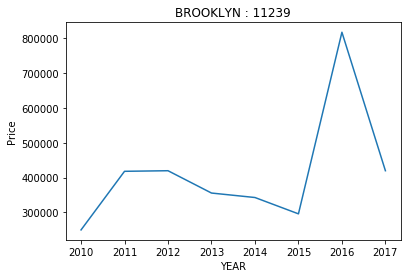

In [37]:
zipcode_plot(zip_b_df, 11239, 'BROOKLYN')

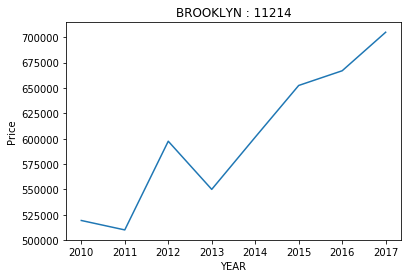

In [38]:
zipcode_plot(zip_b_df, 11214, 'BROOKLYN')

In [39]:
# selecting the rows with borough = manhattan
zip_m_df = zip_df[zip_df['BOROUGH'] == 'MANHATTAN']

# remove borough column
zip_m_df = zip_m_df.drop(['BOROUGH'], axis = 1)

# pivot the dataframe to find mean prices for each zipcode in different years
zip_m_df = zip_m_df.pivot_table(index = 'YEAR', columns = 'ZIPCODE', aggfunc = 'mean', fill_value = 0)

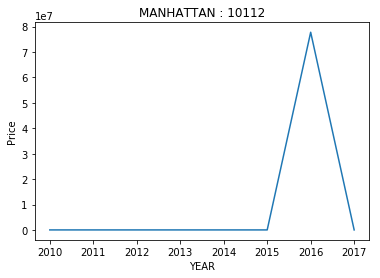

In [48]:
zipcode_plot(zip_m_df, 10112, 'MANHATTAN')

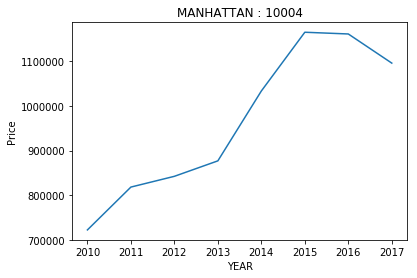

In [44]:
zipcode_plot(zip_m_df, 10004, 'MANHATTAN')

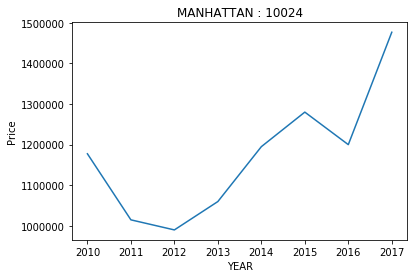

In [45]:
zipcode_plot(zip_m_df, 10024, 'MANHATTAN')

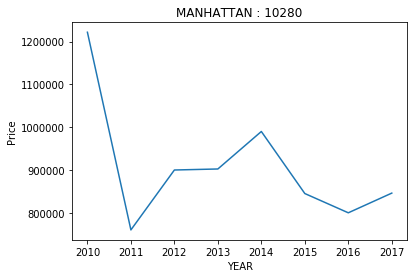

In [46]:
zipcode_plot(zip_m_df, 10280, 'MANHATTAN')

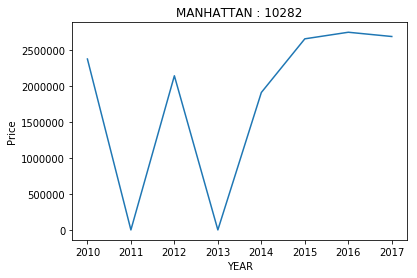

In [47]:
zipcode_plot(zip_m_df, 10282, 'MANHATTAN')